# MLS-Project-2020

In [1]:
# Data Frames
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# More Plotting
import seaborn as sns
# Machine Learning
import sklearn.linear_model as lin
# Manipulating Data
import numpy as np
# Neural networks
import tensorflow.keras as kr

In [2]:
# Read Dataset into Dataframe
power_data = pd.read_csv("Resources/power_dataset.csv")

power_data

speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]

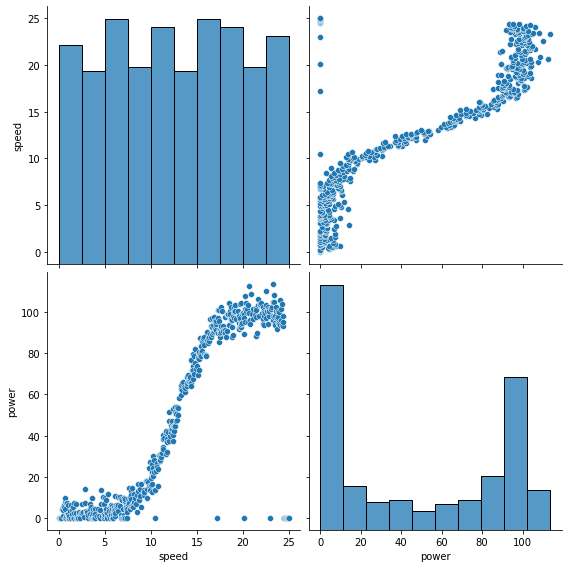

In [3]:
# Pairplot used to get basic overview of relationship between wind speed and power
sns.pairplot(power_data, height=4)

## Pairplot

The pairplot above of the power_data shows a couple of different things.

- The plot of speed by speed shows that we have a pretty much uniform distribution of wind speed accross 0-25 units of assuming mph.
- The plot of power by power indicates that for a great deal of time 0 power was produced even though there was a pretty much uniform spread of speed accross the dataset with another peak aroun the 100 power unit. This leads me to believe that for a great amount of time that even though power could have been produced the windmill was not producing power possibly for maintenance reasons.
- Finally when we look at the plot of speed and power we can see what looks like a linear relationship between wind speed and power because as the wind speed increases so to does the power production.
- Also from the plot of speed and power we can assume the earlier suggestion was correct in that even though the wind speeds were higher that 10 0 power was produced, comparing this to other rows where power was produced and quite a lot in comparison we can assume that the windmill was down for whatever reason.
- It appears that power production starts to increase above a wind speed of 10, also for the training of our model we can safetly not include the lines where wind speed is greater than or equal to 10 so as to get a more accurate model.

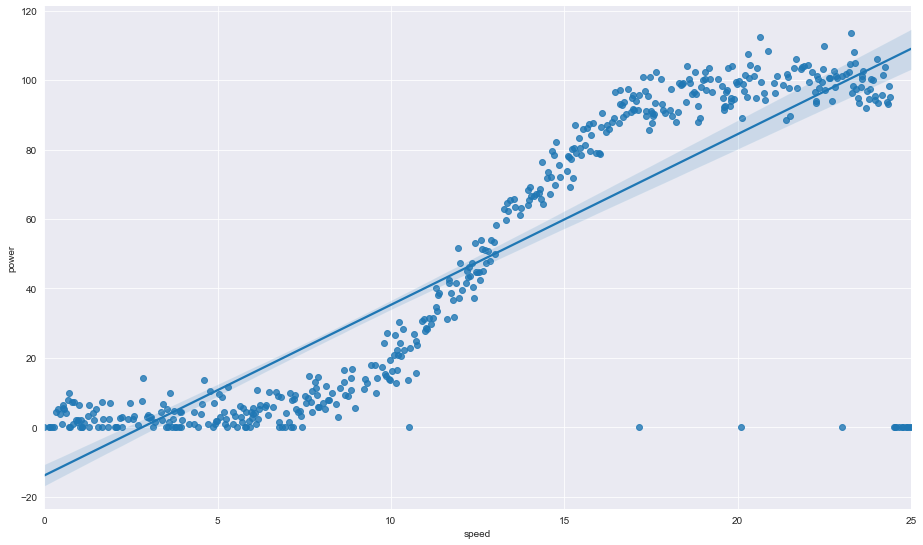

In [4]:
sns.set_style("darkgrid")

sns.lmplot(x="speed", y="power", data=power_data, height=7.5, aspect=1.7, fit_reg=True);

### Cleanse Data
Remove 0 Values from dataset where windspeed is greater than 0.

In [5]:
# Speed = 0 & Power = 0
clean_data = power_data[(power_data["speed"]==0) & (power_data["power"]==0)]

# Speed > 0 & Power > 0
non_zero = power_data[(power_data["speed"]>0) & (power_data["power"]>0)]

# Combine Data
clean_data = clean_data.append(non_zero)

In [6]:
clean_data

speed    power
0     0.000    0.000
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[452 rows x 2 columns]

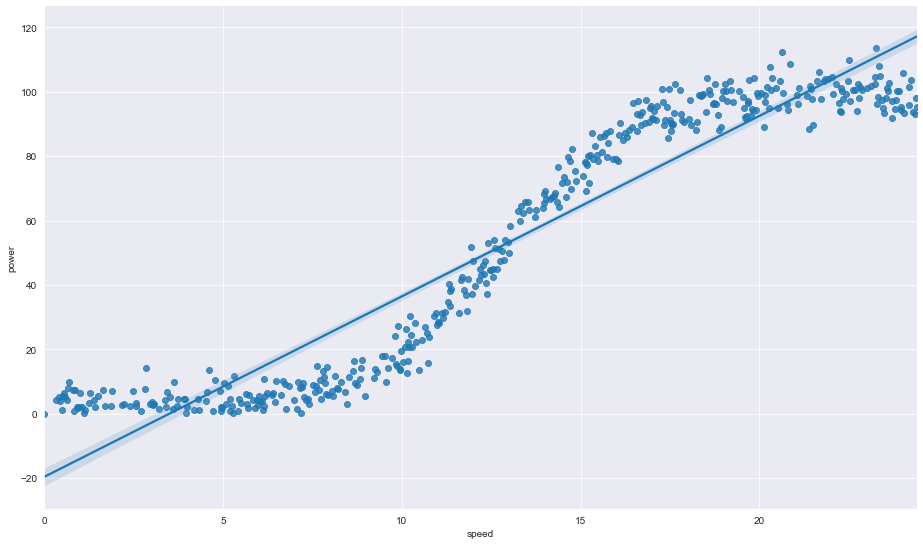

In [7]:
sns.set_style("darkgrid")

sns.lmplot(x="speed", y="power", data=clean_data, height=7.5, aspect=1.7, fit_reg=True);

## Models

### Linear Model
Code for below adapted from Topic 3 Lectures.

#### Non Clean Data

In [8]:
nc_x = power_data["speed"].to_numpy()
nc_y = power_data["power"].to_numpy()

nc_x = nc_x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(nc_x, nc_y)
nc_r = model.score(nc_x, nc_y)
nc_p = [model.intercept_, model.coef_[0]]

In [9]:
nc_r

0.7289360258564073

In [10]:
nc_p

[-13.899902630519634, 4.9175956654046695]

### Non Clean Linear Model Prediction
0 Values were removed from the dataset to try to remove any noise in the analysis that could be influencing the regression line as discussed earlier if the windspeed is greater than 0 the power output should not be 0.

In [11]:
def nc_linear_model(nc_x, nc_p):
    return nc_p[0] + nc_x * nc_p[1]

In [12]:
def nc_linear_predict(nc_x):
    return nc_linear_model(nc_x, nc_p)

In [13]:
nc_linear_predict(20.0)

84.45201067757375

#### Cleansed Data

In [14]:
c_x = clean_data["speed"].to_numpy()
c_y = clean_data["power"].to_numpy()

c_x = c_x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(c_x, c_y)
c_r = model.score(c_x, c_y)
c_p = [model.intercept_, model.coef_[0]]

In [15]:
c_r

0.8983450728341917

In [16]:
c_p

[-19.636232996770858, 5.606684691495636]

### Cleansed Linear Model Prediction

In [17]:
def c_linear_model(c_x, c_p):
    return c_p[0] + c_x * c_p[1]

In [18]:
def c_linear_predict(c_x):
    return c_linear_model(c_x, c_p)

In [19]:
c_linear_predict(20.0)

92.49746083314187

Cleaning up the data appears to have given a better fit to the line as at the higher end of the plot the regression line is closer to the cluster of power points. The orignial prediction for a windspeed of 20.0 was **84.45**, whereas the prediction from the cleansed data has given a result of **92.50**. 

When we take a look at the graph below along with both predictions with a wind speed of 20.0 as mentioned above, additional predictions were also plotted for 5, 10, 15 and 25 wind speed also. For all predictions bar the one with windspeed 10 the Cleaned data was closer to the groupings of actual data points and so this seems to be the more accurate linear model.

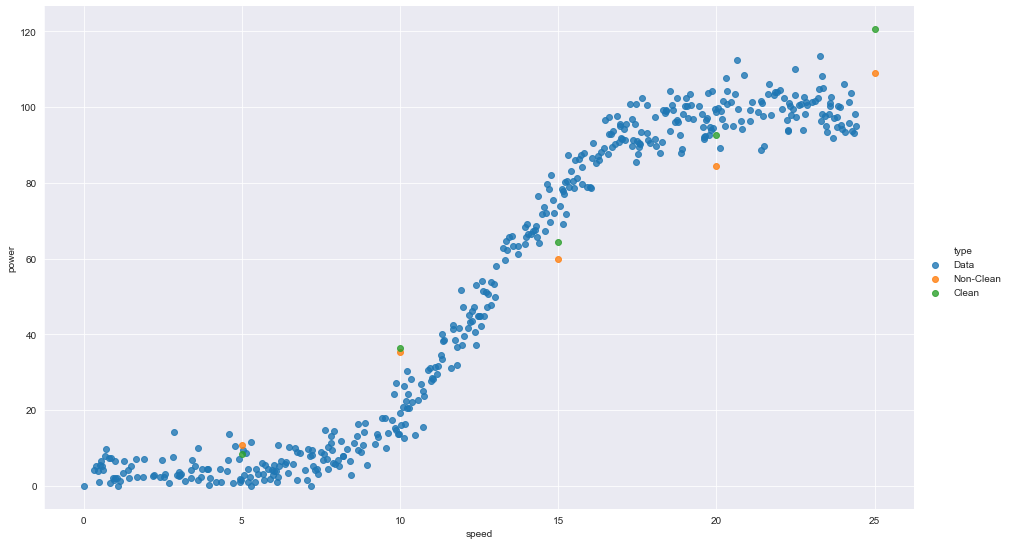

In [20]:
sns.set_style("darkgrid")

# Dataframe to house Data & Predictions
comparison = clean_data
comparison['type'] = 'Data'

# Counter for While Loop
counter = 5

# Make 5 Predictions Using Non-Clean Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[nc_linear_predict(counter)], 'type':['Non-Clean']}
    comparison = comparison.append(pd.DataFrame(data=d))
    counter += 5

# Reset Counter
counter = 5

# Make 5 Predictions Using Cleaned Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[c_linear_predict(counter)], 'type':['Clean']}
    comparison = comparison.append(pd.DataFrame(data=d))
    counter += 5
    
# Plot all data together
sns.lmplot(x="speed", y="power", data=comparison, hue="type", height=7.5, aspect=1.7, fit_reg=False);

The above models will be taken and converted to a Python Class for simplification of function calls with the server but will remain as originally coded in this notebook.

In [21]:
zero_x = clean_data["speed"].to_numpy()
zero_y = clean_data["power"].to_numpy()

zero_x = zero_x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(zero_x, zero_y)
zero_r = model.score(zero_x, zero_y)
zero_p = [model.intercept_, model.coef_[0]]

In [22]:
zero_r

0.8983450728341917

In [23]:
zero_p

[-19.636232996770858, 5.606684691495636]

In [24]:
def zero_linear_model(zero_x, zero_p):
    return zero_p[0] + zero_x * zero_p[1]

In [25]:
def zero_linear_predict(zero_x):
    return zero_linear_model(zero_x, zero_p)

In [26]:
zero_linear_predict(20.0)

92.49746083314187

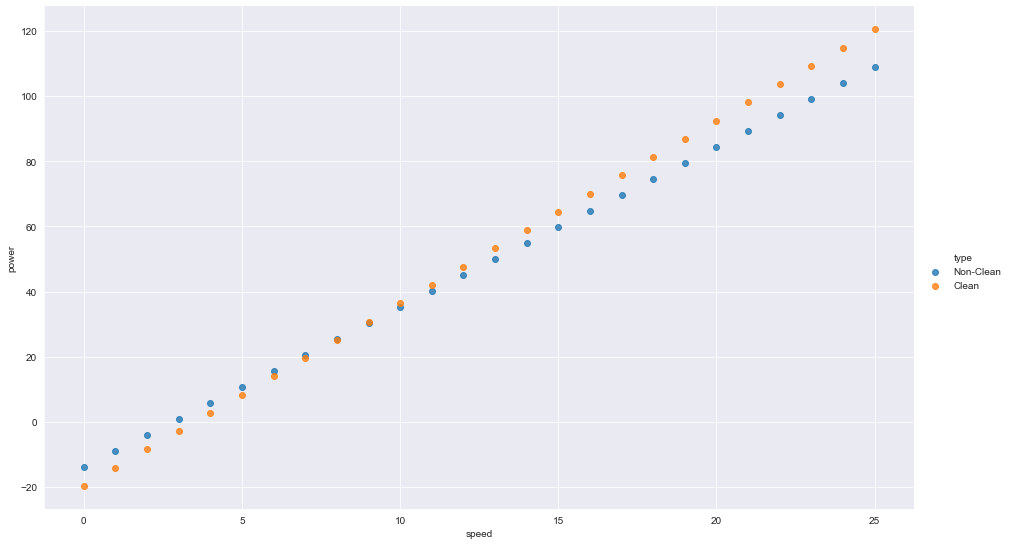

In [27]:
sns.set_style("darkgrid")

# Dataframe to house Data & Predictions
adjust_origin = pd.DataFrame(columns=['speed','power','type'])



# Counter for While Loop
counter = 0

# Make 5 Predictions Using Non-Clean Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[nc_linear_predict(counter)], 'type':['Non-Clean']}
    adjust_origin = adjust_origin.append(pd.DataFrame(data=d))
    counter += 1

# Reset Counter
counter = 0

# Make 5 Predictions Using Cleaned Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[c_linear_predict(counter)], 'type':['Clean']}
    adjust_origin = adjust_origin.append(pd.DataFrame(data=d))
    counter += 1
    
# Attempt to adjust origin to Zero
while counter < 26:
    d = {'speed':[counter], 'power':[zero_linear_predict(counter)], 'type':['Zero']}
    adjust_origin = adjust_origin.append(pd.DataFrame(data=d))
    counter += 1    
    

    
# Plot all data together
sns.lmplot(x="speed", y="power", data=adjust_origin, hue="type", height=7.5, aspect=1.7, fit_reg=False);

### Sigmoid Neural Network Model
***
Code adapted from Topic 7 lectures on Neural Networks 

In [28]:
# Train Model using Sigmoid Activation which most closely matches data
model = kr.models.Sequential()
# Use 50 Sigmoid Neuron Layer
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Use Single Linear Layer to ensure numbers align with raw data else will stay < 1
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [29]:
# Fit the data/Train Model
# Trys to get lowest cost score by small changes
model.fit(clean_data['speed'], clean_data['power'], epochs=500, batch_size=1)

Epoch 1/500
452/452 [==============================] - 1s 1ms/step - loss: 3594.2495
Epoch 2/500
452/452 [==============================] - 0s 746us/step - loss: 2472.6570
Epoch 3/500
452/452 [==============================] - 0s 644us/step - loss: 1881.8678
Epoch 4/500
452/452 [==============================] - 0s 929us/step - loss: 1498.1725
Epoch 5/500
452/452 [==============================] - 0s 891us/step - loss: 1217.4572
Epoch 6/500
452/452 [==============================] - 0s 938us/step - loss: 994.7625
Epoch 7/500
452/452 [==============================] - 0s 880us/step - loss: 813.0489
Epoch 8/500
452/452 [==============================] - 0s 861us/step - loss: 660.1187
Epoch 9/500
452/452 [==============================] - 0s 706us/step - loss: 534.5723
Epoch 10/500
452/452 [==============================] - 0s 816us/step - loss: 431.6270
Epoch 11/500
452/452 [==============================] - 1s 1ms/step - loss: 347.9487
Epoch 12/500
452/452 [=============================

452/452 [==============================] - 0s 649us/step - loss: 22.1868
Epoch 98/500
452/452 [==============================] - 0s 627us/step - loss: 21.8151
Epoch 99/500
452/452 [==============================] - 0s 825us/step - loss: 21.7065
Epoch 100/500
452/452 [==============================] - 1s 1ms/step - loss: 21.6963
Epoch 101/500
452/452 [==============================] - 1s 1ms/step - loss: 21.5596
Epoch 102/500
452/452 [==============================] - 1s 2ms/step - loss: 21.1761
Epoch 103/500
452/452 [==============================] - 1s 2ms/step - loss: 20.9261
Epoch 104/500
452/452 [==============================] - 1s 2ms/step - loss: 20.9069
Epoch 105/500
452/452 [==============================] - 1s 2ms/step - loss: 20.5865
Epoch 106/500
452/452 [==============================] - 1s 2ms/step - loss: 20.6601
Epoch 107/500
452/452 [==============================] - 0s 1ms/step - loss: 20.3446
Epoch 108/500
452/452 [==============================] - 0s 612us/step - lo

452/452 [==============================] - 1s 2ms/step - loss: 17.4833
Epoch 193/500
452/452 [==============================] - 1s 2ms/step - loss: 17.5189
Epoch 194/500
452/452 [==============================] - 1s 2ms/step - loss: 17.6753
Epoch 195/500
452/452 [==============================] - 1s 2ms/step - loss: 17.3459
Epoch 196/500
452/452 [==============================] - 1s 2ms/step - loss: 17.4632
Epoch 197/500
452/452 [==============================] - 1s 2ms/step - loss: 17.1307
Epoch 198/500
452/452 [==============================] - 1s 1ms/step - loss: 17.5976
Epoch 199/500
452/452 [==============================] - 1s 1ms/step - loss: 17.4380
Epoch 200/500
452/452 [==============================] - 1s 1ms/step - loss: 17.6421
Epoch 201/500
452/452 [==============================] - 0s 900us/step - loss: 17.3938
Epoch 202/500
452/452 [==============================] - 0s 607us/step - loss: 17.4423
Epoch 203/500
452/452 [==============================] - 0s 616us/step - lo

452/452 [==============================] - 0s 671us/step - loss: 17.2639
Epoch 288/500
452/452 [==============================] - 0s 660us/step - loss: 17.1215
Epoch 289/500
452/452 [==============================] - 0s 655us/step - loss: 17.0550
Epoch 290/500
452/452 [==============================] - 1s 2ms/step - loss: 17.2638
Epoch 291/500
452/452 [==============================] - 1s 2ms/step - loss: 17.3572: 0s - loss: 17.
Epoch 292/500
452/452 [==============================] - 1s 2ms/step - loss: 17.1885
Epoch 293/500
452/452 [==============================] - ETA: 0s - loss: 17.33 - 1s 2ms/step - loss: 17.2508
Epoch 294/500
452/452 [==============================] - 1s 2ms/step - loss: 17.0378
Epoch 295/500
452/452 [==============================] - 1s 1ms/step - loss: 17.1985
Epoch 296/500
452/452 [==============================] - 0s 962us/step - loss: 17.4932
Epoch 297/500
452/452 [==============================] - 1s 1ms/step - loss: 17.2689
Epoch 298/500
452/452 [========

452/452 [==============================] - 0s 633us/step - loss: 17.0480
Epoch 382/500
452/452 [==============================] - 0s 612us/step - loss: 17.2196
Epoch 383/500
452/452 [==============================] - 0s 655us/step - loss: 17.0185
Epoch 384/500
452/452 [==============================] - 0s 718us/step - loss: 17.1950
Epoch 385/500
452/452 [==============================] - 1s 2ms/step - loss: 17.3584
Epoch 386/500
452/452 [==============================] - 1s 2ms/step - loss: 17.0721
Epoch 387/500
452/452 [==============================] - ETA: 0s - loss: 16.7734 ETA: 0s - loss: - ETA:  - 1s 2ms/step - loss: 16.9388
Epoch 388/500
452/452 [==============================] - 1s 2ms/step - loss: 17.1697: 0s - loss:
Epoch 389/500
452/452 [==============================] - 1s 2ms/step - loss: 17.0120: 
Epoch 390/500
452/452 [==============================] - 1s 2ms/step - loss: 17.1871
Epoch 391/500
452/452 [==============================] - 0s 793us/step - loss: 17.1179
Epoch

452/452 [==============================] - 1s 2ms/step - loss: 17.2418
Epoch 476/500
452/452 [==============================] - 0s 1ms/step - loss: 17.0958
Epoch 477/500
452/452 [==============================] - 0s 1ms/step - loss: 17.1890
Epoch 478/500
452/452 [==============================] - 0s 973us/step - loss: 17.2074
Epoch 479/500
452/452 [==============================] - 0s 984us/step - loss: 17.4306
Epoch 480/500
452/452 [==============================] - 1s 2ms/step - loss: 17.2913
Epoch 481/500
452/452 [==============================] - 1s 2ms/step - loss: 17.3583
Epoch 482/500
452/452 [==============================] - 1s 2ms/step - loss: 16.9388
Epoch 483/500
452/452 [==============================] - 1s 2ms/step - loss: 17.0702
Epoch 484/500
452/452 [==============================] - 1s 2ms/step - loss: 17.1440
Epoch 485/500
452/452 [==============================] - 1s 2ms/step - loss: 16.9469
Epoch 486/500
452/452 [==============================] - 1s 2ms/step - loss

In [30]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

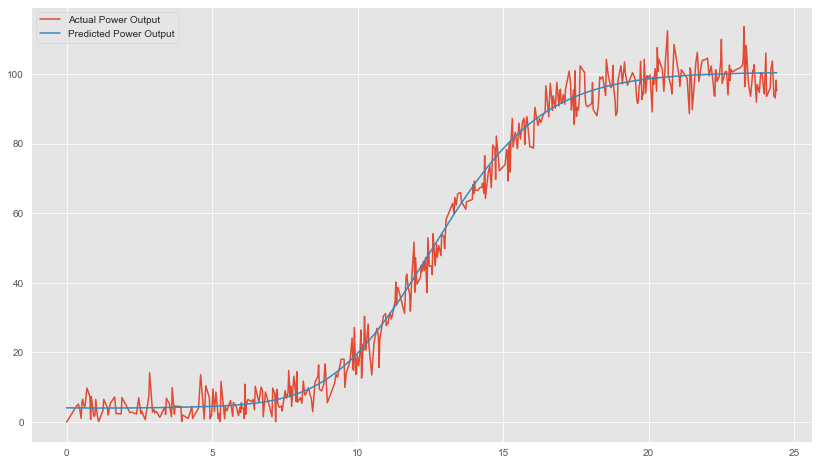

In [31]:
# Plot Data and Predictions to Visualise
plt.plot(clean_data['speed'], clean_data['power'], label='Actual Power Output')
plt.plot(clean_data['speed'], model.predict(clean_data['speed']), label='Predicted Power Output')
plt.legend();

In [32]:
# Make Prediction Using Wind Speed 20
model.predict([20.0])

array([[98.577675]], dtype=float32)